# R-73501 Case Study Data Preparation Part
This notebook is used to clean data and get data ready for data exploration in Tableau (Tableau workbook [here](https://public.tableau.com/views/Expediatakehomeassessment/Homepage?:language=en-US&:display_count=n&:origin=viz_share_link)). The notebook includes following parts:
1. Data Clean
2. Variables Relationship Exploration
    + 2.1 Univariate Analysis
        + 2.1.1 Continuous Variables
        + 2.1.2 Categorical Variables
    + 2.2 Bivariate Analysis
        + 2.2.1 Numerical & Numerical
        + 2.2.2 Numerical & Categorical
        + 2.2.3 Categorical & Categorical


## 1. Data Clean

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

plt.style.use('bmh')

In [2]:
df = pd.read_csv('Marketing_Analytics_Insights_Case_Study_Dataset.csv')
df.head()

,Date,Geographic Region,Platform,Marketing Channel,Visits,Qualified Shoppers,Bounced Visits,Gross Orders,Net Orders,Net Room Nights
0,01/01/2017,Geo Region 1,Desktop,Channel 1,3011,1878,811,1139,957,1848
1,01/01/2017,Geo Region 1,Desktop,Channel 2,119684,82504,26541,12489,10369,19897
2,01/01/2017,Geo Region 1,Desktop,Channel 3,25612,11828,7398,1399,1139,2257
3,01/01/2017,Geo Region 1,Desktop,Channel 4,3115,1463,1393,69,50,81
4,01/01/2017,Geo Region 1,Desktop,Channel 5,5657,4307,1346,641,517,921


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87856 entries, 0 to 87855
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                87856 non-null  object
 1   Geographic Region   87856 non-null  object
 2   Platform            87856 non-null  object
 3   Marketing Channel   87856 non-null  object
 4   Visits              87856 non-null  int64 
 5   Qualified Shoppers  87856 non-null  int64 
 6   Bounced Visits      87856 non-null  int64 
 7   Gross Orders        87856 non-null  int64 
 8   Net Orders          87856 non-null  int64 
 9   Net Room Nights     87856 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 6.7+ MB


In [4]:
#when converting date format, we see incorrect data value:2017-02-29. Drop the row with incorrect value.
df.drop(df[df['Date'] == '2017-02-29'].index,inplace = True)

In [5]:
df['Date']=pd.to_datetime(df["Date"],format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

In [6]:
# check whether there is any missing value
df.isnull().sum()

Date                  0
Geographic Region     0
Platform              0
Marketing Channel     0
Visits                0
Qualified Shoppers    0
Bounced Visits        0
Gross Orders          0
Net Orders            0
Net Room Nights       0
dtype: int64

In [7]:
# a basic understanding of the value in categorical variables
for col in df.iloc[:,:4].columns:
    print('{} : {}'.format(col,df[col].unique()))

Date : ['2017-01-01' '2017-01-02' '2017-01-03' ... '2019-12-29' '2019-12-30'
 '2019-12-31']
Geographic Region : ['Geo Region 1' 'Geo Region 2' 'Geo Region 3' 'Geo Region 4']
Platform : ['Desktop' 'Mobile']
Marketing Channel : ['Channel 1' 'Channel 2' 'Channel 3' 'Channel 4' 'Channel 5' 'Channel 6'
 'Channel 7' 'Channel 8' 'Channel 9' 'Channel 10' 'Channel 11']


In [8]:
# a basic understanding of value in numeric columns
df.describe()

,Visits,Qualified Shoppers,Bounced Visits,Gross Orders,Net Orders,Net Room Nights
count,87776.000000,87776.000000,87776.000000,87776.000000,87776.000000,87776.000000
mean,27811.110736,12942.688081,12502.429821,1165.088168,940.076980,1994.250957
std,42476.870217,21942.037066,23045.713549,3159.710456,2551.822861,5502.335941
min,1.000000,0.000000,0.000000,0.000000,-100.000000,-267.000000
25%,4161.750000,1723.750000,1571.000000,75.000000,59.000000,129.000000
50%,12306.000000,5811.500000,4924.000000,329.000000,261.000000,555.000000
75%,33670.000000,15217.250000,13952.000000,1012.000000,807.000000,1659.000000
max,683764.000000,280919.000000,546089.000000,38354.000000,35318.000000,79141.000000


# 2. Variables Relationship Exploration
## 2.1 Univariate Analysis
In this type of analysis, we use a single variable and plot charts on it. Here the charts are created to see the distribution and the composition of the data depending on the type of variable namely categorical or numerical.
### 2.1.1 Continuous Variables
To see the distribution of data we create Box plots and Histograms.

array([[<AxesSubplot:title={'center':'Visits'}>,
        <AxesSubplot:title={'center':'Qualified Shoppers'}>],
       [<AxesSubplot:title={'center':'Bounced Visits'}>,
        <AxesSubplot:title={'center':'Gross Orders'}>],
       [<AxesSubplot:title={'center':'Net Orders'}>,
        <AxesSubplot:title={'center':'Net Room Nights'}>]], dtype=object)

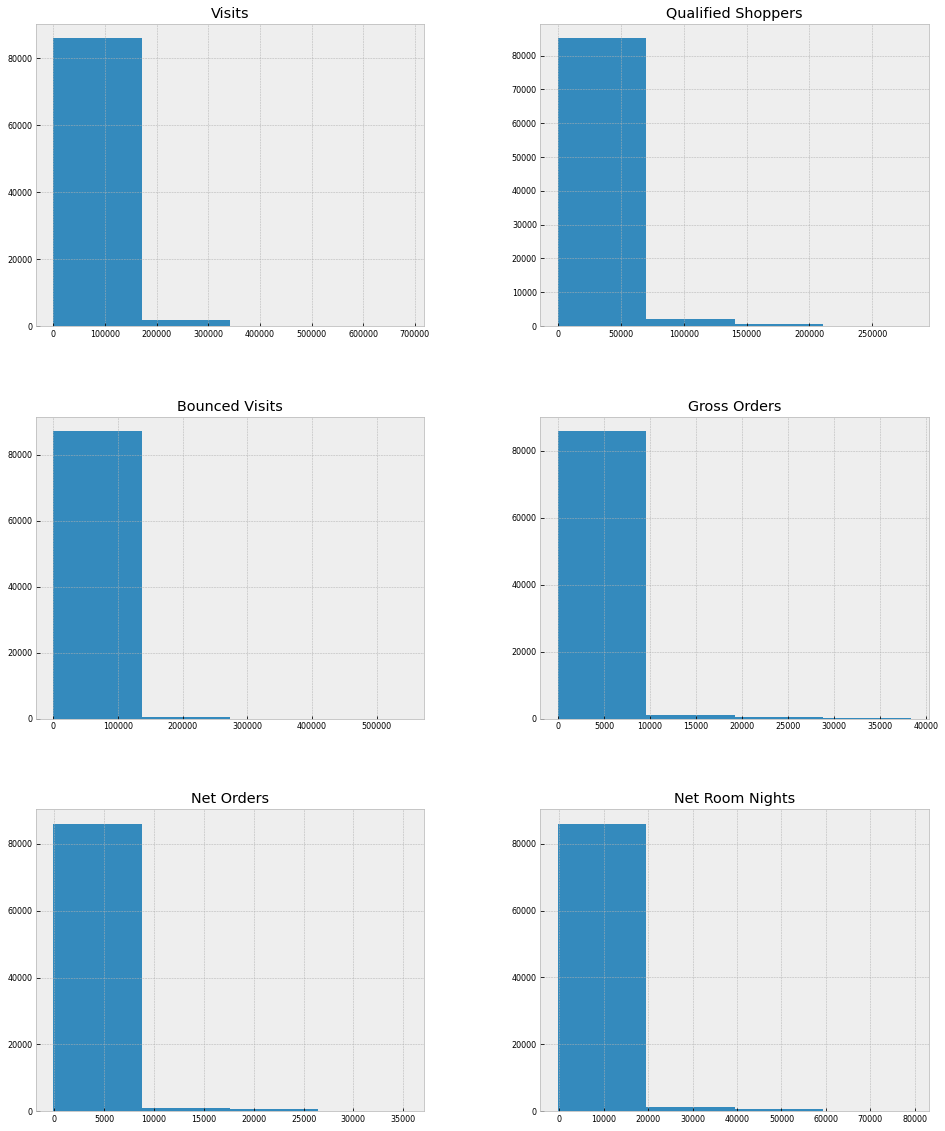

In [9]:
df_num=df.select_dtypes(include = ['int64'])
df_num.hist(figsize=(16, 20), bins=4, xlabelsize=8, ylabelsize=8)

### 2.1.2 Categorical Variables
To see the distribution of data we create frequency plots like Bar charts, Horizontal Bar charts, etc.
To see the composition of data we create Pie charts.

In [10]:
df_category = df.iloc[:,1:4]
df_category.columns

Index(['Geographic Region', 'Platform', 'Marketing Channel'], dtype='object')

/var/folders/jy/m42t1yln5h57kh03rwktz_zh0000gs/T/ipykernel_58906/3189229514.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/var/folders/jy/m42t1yln5h57kh03rwktz_zh0000gs/T/ipykernel_58906/3189229514.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/var/folders/jy/m42t1yln5h57kh03rwktz_zh0000gs/T/ipykernel_58906/3189229514.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)


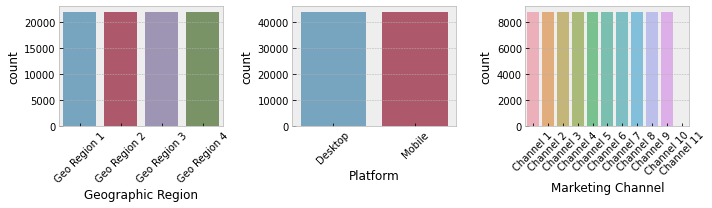

In [11]:
#seems to be a balanced dataset
fig, axes = plt.subplots(round(len(df_category.columns) / 3), 3, figsize=(10, 3))

for i, ax in enumerate(fig.axes):
    if i < len(df_category.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_category.columns[i], alpha=0.7, data=df_category, ax=ax)

fig.tight_layout()

## 2.2 Bivariate Analysis
In this type of analysis, we take two variables at a time and create charts on them. Since we have 2 types of variables Categorical and Numerical so there can be 3 cases in bivariate analysis :

### 2.2.1 Numerical & Numerical
To see the relationship between the 2 variables we create Scatter Plots and a Correlation Matrix with a Heatmap on the top.

<AxesSubplot:>

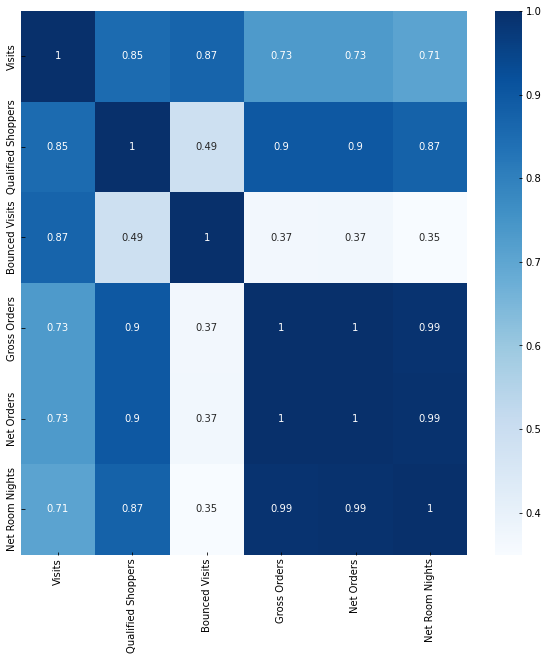

In [12]:
#all numeric variables except for bounced sessions are positively correlated with net nights
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

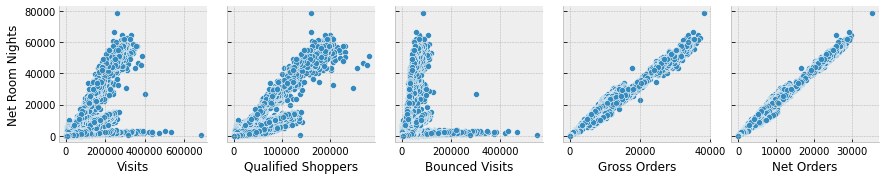

In [13]:
df_num["Net Room Nights"]=df["Net Room Nights"]
for i in range(0, len(df_num.columns), 6):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Net Room Nights'])

### 2.2.2 Numerical & Categorical
Explore the relationship between net room nights and categorical variables with box chart.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Geo Region 1'),
  Text(1, 0, 'Geo Region 2'),
  Text(2, 0, 'Geo Region 3'),
  Text(3, 0, 'Geo Region 4')])

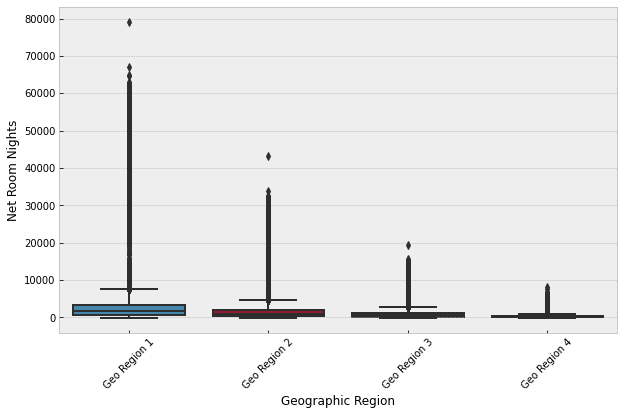

In [14]:
#Geo 1 is the main driver
df_category["Net Room Nights"]= df["Net Room Nights"]
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Geographic Region', y='Net Room Nights', data=df_category)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Desktop'), Text(1, 0, 'Mobile')])

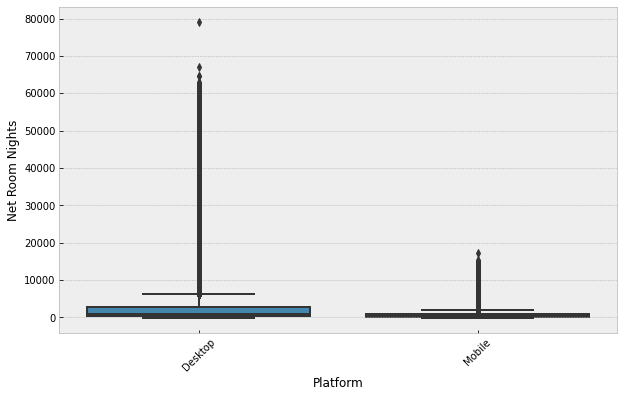

In [15]:
# desktop brings more net nights than mobile
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Platform', y='Net Room Nights', data=df_category)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Channel 1'),
  Text(1, 0, 'Channel 2'),
  Text(2, 0, 'Channel 3'),
  Text(3, 0, 'Channel 4'),
  Text(4, 0, 'Channel 5'),
  Text(5, 0, 'Channel 6'),
  Text(6, 0, 'Channel 7'),
  Text(7, 0, 'Channel 8'),
  Text(8, 0, 'Channel 9'),
  Text(9, 0, 'Channel 10'),
  Text(10, 0, 'Channel 11')])

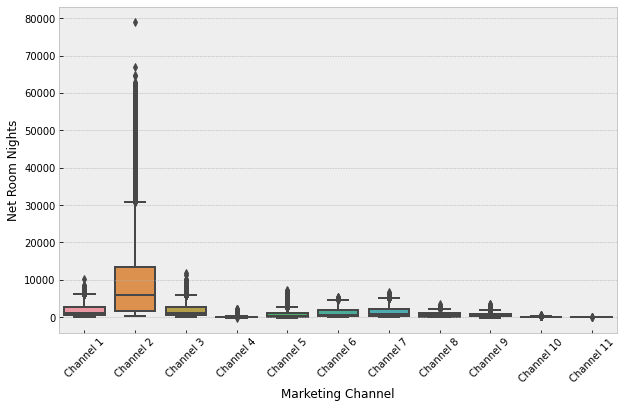

In [16]:
#channel 2 is the main driver
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Marketing Channel', y='Net Room Nights', data=df_category)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [17]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df.set_index("Date")

,Geographic Region,Platform,Marketing Channel,Visits,Qualified Shoppers,Bounced Visits,Gross Orders,Net Orders,Net Room Nights,year,month
Date,,,,,,,,,,,
2017-01-01,Geo Region 1,Desktop,Channel 1,3011,1878,811,1139,957,1848,2017,1
2017-01-01,Geo Region 1,Desktop,Channel 2,119684,82504,26541,12489,10369,19897,2017,1
2017-01-01,Geo Region 1,Desktop,Channel 3,25612,11828,7398,1399,1139,2257,2017,1
2017-01-01,Geo Region 1,Desktop,Channel 4,3115,1463,1393,69,50,81,2017,1
2017-01-01,Geo Region 1,Desktop,Channel 5,5657,4307,1346,641,517,921,2017,1
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,Geo Region 4,Mobile,Channel 6,36235,12773,19264,110,86,206,2019,12
2019-12-31,Geo Region 4,Mobile,Channel 7,18389,7074,9493,79,69,155,2019,12
2019-12-31,Geo Region 4,Mobile,Channel 8,501,302,200,8,6,15,2019,12


<AxesSubplot:xlabel='year'>

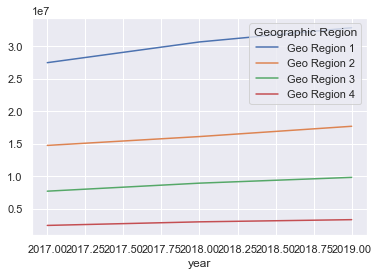

In [18]:
sns.set()  # use Seaborn styles
df.pivot_table('Net Room Nights', index='year', columns='Geographic Region', aggfunc='sum').plot()

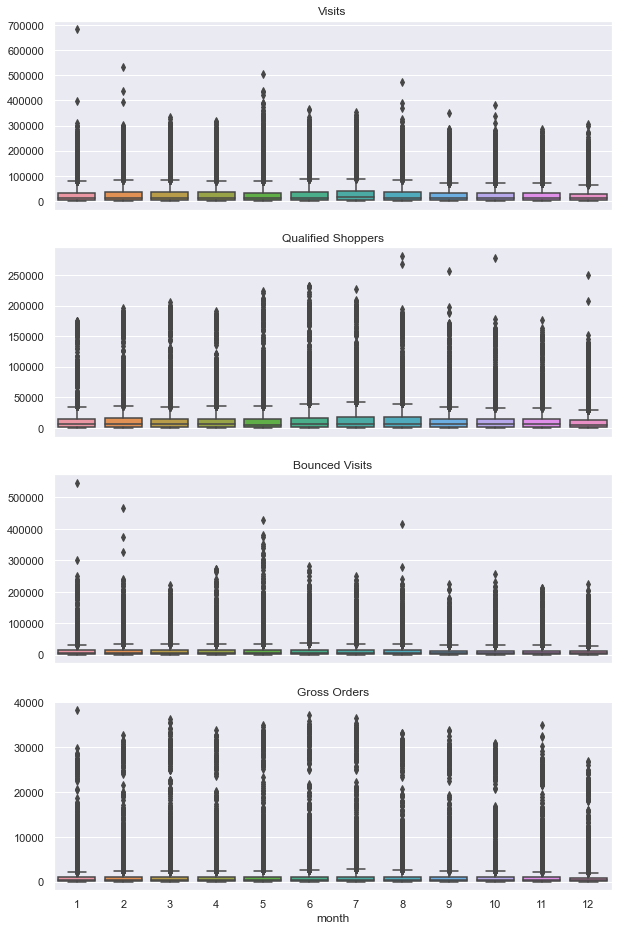

In [19]:
fig, axes = plt.subplots(4, 1, figsize=(10, 16), sharex=True)
for name, ax in zip(['Visits', 'Qualified Shoppers', 'Bounced Visits', 'Gross Orders','Net Orders','Net Room Nights'], axes):
    sns.boxplot(data = df, x='month', y=name, ax=ax)
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

### 2.2.3 Categorical & Categorical
We create a pivot table to understand whether all marketing channels are launched in all regions and platforms.

In [20]:
df.pivot_table(index='Geographic Region', columns='Marketing Channel', 
                        aggfunc='size', fill_value=0)

Marketing Channel,Channel 1,Channel 10,Channel 11,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,Channel 9
Geographic Region,,,,,,,,,,,
Geo Region 1,2194,2194,4,2194,2194,2194,2194,2194,2194,2194,2194
Geo Region 2,2194,2194,4,2194,2194,2194,2194,2194,2194,2194,2194
Geo Region 3,2194,2194,4,2194,2194,2194,2194,2194,2194,2194,2194
Geo Region 4,2194,2194,4,2194,2194,2194,2194,2194,2194,2194,2194


In [21]:
df.pivot_table(index='Platform', columns='Marketing Channel', 
                        aggfunc='size', fill_value=0)

Marketing Channel,Channel 1,Channel 10,Channel 11,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,Channel 9
Platform,,,,,,,,,,,
Desktop,4388,4388,8,4388,4388,4388,4388,4388,4388,4388,4388
Mobile,4388,4388,8,4388,4388,4388,4388,4388,4388,4388,4388
